<a href="https://colab.research.google.com/github/Krukalex/Stock-Price-ARIMA/blob/main/Time_series_stock_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lst=[1,2,4,5,6,7,8,9,10]
lst2=list(range(1,11))

sum(lst2)-sum(lst)


3

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm

In [ ]:
#from statsmodels.tsa.deterministic import Tuple
def tracker(returns, price, amt, order, thresh):
  holding=False
  init_amt=amt
  for date, r in tqdm(returns.iloc[14:].items(), total=len(returns.iloc[14:])):
    if holding:
      sell_price=price.loc[date]
      holding=False
      ret = (sell_price-buy_price)/buy_price
      amt *= (1+ret)
    curr_data = returns[:date]
    if type(order)==tuple:
      try:
        model=ARIMA(curr_data, order=order).fit()
        forecast=model.forecast()[0][0]
      except:
        forecast=thresh-1
    if not holding and forecast> thresh:
      holding=True
      buy_price=price.loc[date]
  
  return amt





In [ ]:
ticker='AAPL'
data=yf.Ticker(ticker)

In [ ]:
#closing prices everyday for the desired period
prices=data.history(start='2015-01-01', end='2021-12-31').Close
returns = prices.pct_change().dropna()

In [ ]:
for date, r in tqdm(returns.iloc[14:].items(), total=len(returns.iloc[14:])):
  print(prices.loc[date])

In [ ]:
result1=tracker(returns, prices, 100, (1,0,1), .005)

In [ ]:
result1

108.8600460515081

In [ ]:
returns=returns.asfreq('D').dropna()

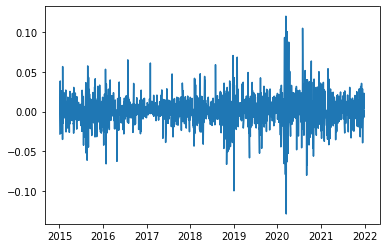

In [ ]:
plt.plot(returns)

In [ ]:
train_end= datetime(2020, 12, 31)
test_end=datetime(2021, 12,31)

In [ ]:
train=returns[:train_end]
test= returns[train_end+timedelta(1): test_end]

In [ ]:
train=train.asfreq('D').dropna()

In [ ]:
test=test.asfreq('D').dropna()

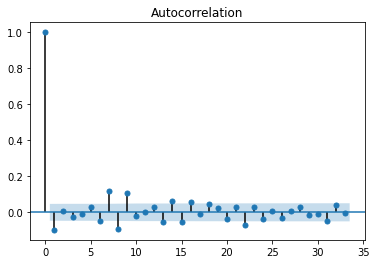

In [ ]:
#acf tells us moving average part of a model, looks like ma(5) model makes sense here, so we will try that first

plot_acf(returns)
plt.show()

In [ ]:
model = ARIMA(train, order=(1,0,0)).fit()

In [ ]:
model.summary()

In [ ]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [ ]:
model.forecast()[0]

array([0.00223217])

In [ ]:
predictions=model.predict(start=train.index[0], end=train.index[-1])
residuals=train-predictions

In [ ]:
train-predictions

In [ ]:
history=[x for x in train]
preds=list()

for i in range(len(test)):
  model=ARIMA(history, (0,0,1))
  prediction=model.fit().forecast()[0][0]
  preds.append(prediction)
  history.append(test[i])



In [ ]:
pred_df=pd.Series(preds)
pred_df.index=test.index

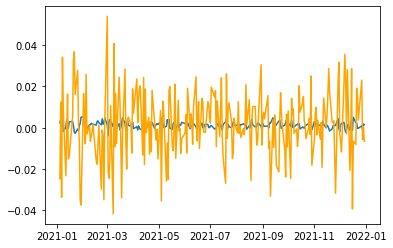

In [ ]:
#doesn't look very good
#try more complex model

plt.plot(pred_df)
plt.plot(test, color='orange')


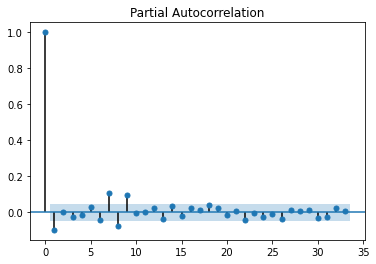

In [ ]:
#try ar(1)

plot_pacf(returns)
plt.show()

In [ ]:
history2=[x for x in train]
preds2=list()

for i in range(len(test)):
  model=ARIMA(history2, (9,1,9))
  prediction=model.fit().forecast()[0][0]
  preds2.append(prediction)
  history2.append(test[i])


In [ ]:
pred_df2=pd.Series(preds2)
pred_df2.index=test.index

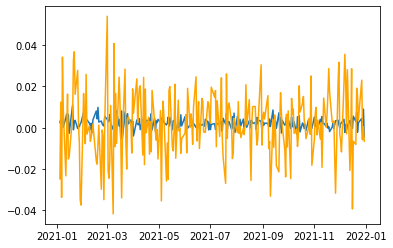

In [ ]:
plt.plot(pred_df2)
plt.plot(test, color='orange')